In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

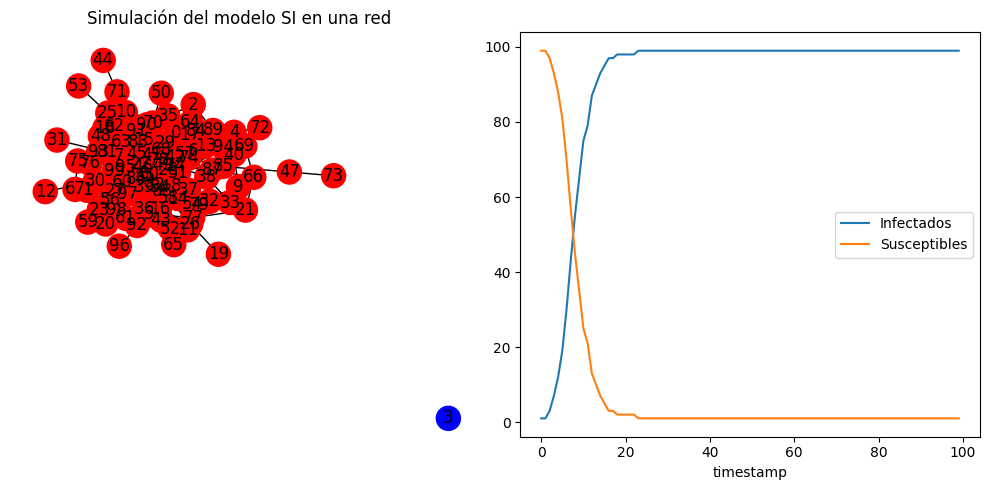

In [ ]:
def simulate_si_model(graph, infection_prob, num_iterations):
    num_nodes = graph.number_of_nodes()
    infected = set()
    quantity_timestamp = None
    quantity_infected = []
    quantity_susceptible = []

    # Seleccionar un nodo inicialmente infectado al azar
    initial_node = np.random.choice(list(graph.nodes()))
    infected.add(initial_node)

    for _ in range(num_iterations):
        # Crear una copia del conjunto de nodos infectados para evitar iterar sobre un conjunto cambiante
        current_infected = list(infected)
        quantity_infected.append(len(current_infected))
        quantity_susceptible.append(num_nodes - len(current_infected))
        # Iterar sobre los nodos infectados
        for node in current_infected:
            neighbors = list(graph.neighbors(node))

            # Propagar la infección a los vecinos susceptibles
            for neighbor in neighbors:
                if neighbor not in infected and np.random.random() < infection_prob:
                    infected.add(neighbor)
    quantity_timestamp = pd.DataFrame({'timestamp':np.arange(0,num_iterations), 'num_infected':np.array(quantity_infected), 'num_susceptible':np.array(quantity_susceptible)})
    return infected, quantity_timestamp

# Crear un grafo aleatorio utilizando la biblioteca NetworkX
num_nodes = 100
avg_degree = 4
graph = nx.erdos_renyi_graph(num_nodes, avg_degree / num_nodes)

# Parámetros de la simulación
infection_prob = 0.2
num_iterations = 100

# Simular el modelo SI
infected_nodes, inf_df = simulate_si_model(graph, infection_prob, num_iterations)

# Dibujar el grafo con los nodos infectados resaltados en rojo
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

node_colors = ['red' if node in infected_nodes else 'blue' for node in graph.nodes()]
axes[0].set_title('Simulación del modelo SI en una red')
nx.draw(graph, with_labels=True, node_color=node_colors, ax = axes[0])

sns.lineplot(x = inf_df['timestamp'], y = inf_df['num_infected'], ax = axes[1], label = 'Infectados')
sns.lineplot(x = inf_df['timestamp'], y = inf_df['num_susceptible'], ax = axes[1], label = 'Susceptibles')
axes[1].set_ylabel('')

plt.legend()
plt.tight_layout()
plt.show()

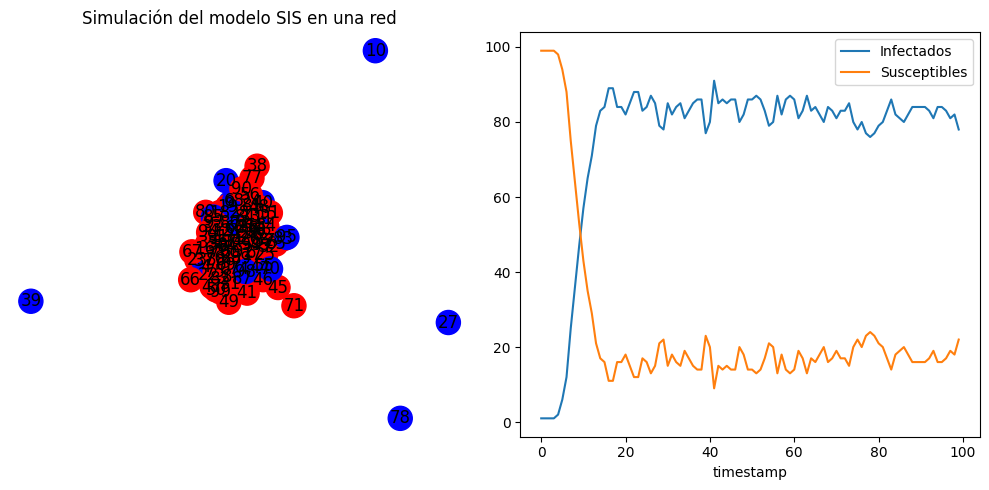

In [ ]:
def simulate_sis_model(graph, infection_prob, recovery_prob, num_iterations):
    num_nodes = graph.number_of_nodes()
    infected = set()

    # Seleccionar un nodo inicialmente infectado al azar
    initial_node = np.random.choice(list(graph.nodes()))
    infected.add(initial_node)
    quantity_timestamp = None
    quantity_infected = []
    quantity_susceptible = []
    for _ in range(num_iterations):
        # Crear una copia del conjunto de nodos infectados para evitar iterar sobre un conjunto cambiante
        current_infected = list(infected)
        quantity_infected.append(len(current_infected))
        quantity_susceptible.append(num_nodes - len(current_infected))
        # Iterar sobre los nodos infectados
        for node in current_infected:
            neighbors = list(graph.neighbors(node))
            # Propagar la infección a los vecinos susceptibles
            for neighbor in neighbors:
                if neighbor not in infected and np.random.random() < infection_prob:
                    infected.add(neighbor)

            # Recuperar los nodos infectados con cierta probabilidad
            if np.random.random() < recovery_prob:
                infected.remove(node)
    quantity_timestamp = pd.DataFrame({'timestamp':np.arange(0,num_iterations), 'num_infected':np.array(quantity_infected), 'num_susceptible':np.array(quantity_susceptible)})
    return infected, quantity_timestamp

# Crear un grafo aleatorio utilizando la biblioteca NetworkX
num_nodes = 100
avg_degree = 4
graph = nx.erdos_renyi_graph(num_nodes, avg_degree / num_nodes)

# Parámetros de la simulación
infection_prob = 0.2
recovery_prob = 0.1
num_iterations = 100

# Simular el modelo SIS
infected_nodes, inf_df = simulate_sis_model(graph, infection_prob, recovery_prob, num_iterations)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


# Dibujar el grafo con los nodos infectados resaltados en rojo
node_colors = ['red' if node in infected_nodes else 'blue' for node in graph.nodes()]

axes[0].set_title('Simulación del modelo SIS en una red')
nx.draw(graph, with_labels=True, node_color=node_colors, ax = axes[0])

sns.lineplot(x = inf_df['timestamp'], y = inf_df['num_infected'], ax = axes[1], label = 'Infectados')
sns.lineplot(x = inf_df['timestamp'], y = inf_df['num_susceptible'], ax = axes[1], label = 'Susceptibles')
axes[1].set_ylabel('')

plt.legend()
plt.tight_layout()

plt.show()

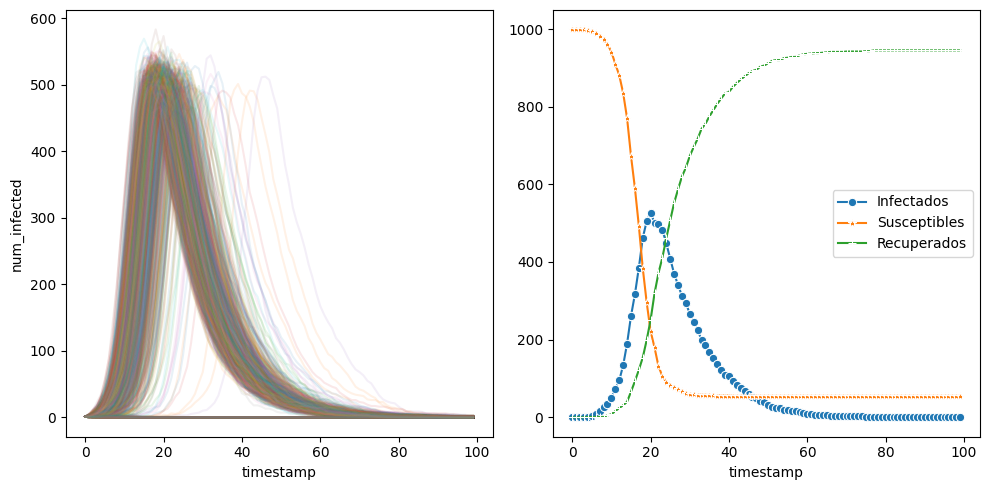

In [ ]:
from scipy.stats import binom


def simulate_sir_model(graph, infection_prob, recovery_prob, num_iterations):
    num_nodes = graph.number_of_nodes()
    infected = set()
    recovered = set()

    # Seleccionar un nodo inicialmente infectado al azar
    initial_node = np.random.choice(list(graph.nodes()))
    infected.add(initial_node)
    quantity_timestamp = None
    quantity_infected = []
    quantity_susceptible = []
    quantity_recovered = []

    for _ in range(num_iterations):
        # Crear una copia de los conjuntos de nodos infectados y recuperados para evitar iterar sobre conjuntos cambiantes
        current_infected = list(infected)
        current_recovered = list(recovered)
        quantity_infected.append(len(current_infected))
        quantity_susceptible.append(num_nodes - len(current_infected) - len(current_recovered))
        quantity_recovered.append(len(current_recovered))
        # Iterar sobre los nodos infectados
        for node in current_infected:
            neighbors = list(graph.neighbors(node))

            # Propagar la infección a los vecinos susceptibles
            for neighbor in neighbors:
                if neighbor not in infected and neighbor not in recovered and np.random.random() < infection_prob:
                    infected.add(neighbor)

            # Recuperar los nodos infectados con cierta probabilidad
            if np.random.random() < recovery_prob:
                infected.remove(node)
                recovered.add(node)
    quantity_timestamp = pd.DataFrame({'timestamp':np.arange(0,num_iterations), 'num_infected':np.array(quantity_infected),
                                       'num_susceptible':np.array(quantity_susceptible), 'num_recovered': np.array(quantity_recovered)})
    return infected, recovered, quantity_timestamp


num_nodes = 1000

avg_degree = 4
graph = nx.erdos_renyi_graph(num_nodes, avg_degree / num_nodes)

num_iterations = 100


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for t in range(1000):

  infection_prob = 0.2
  recovery_prob = 0.1
  infected_nodes, recovered_nodes, inf_df = simulate_sir_model(graph, infection_prob, recovery_prob, num_iterations)
  sns.lineplot(x = inf_df['timestamp'], y = inf_df['num_infected'], ax = axes[0], alpha = 0.1)


node_colors = []
for node in graph.nodes():
    if node in infected_nodes:
        node_colors.append('red')
    elif node in recovered_nodes:
        node_colors.append('green')
    else:
        node_colors.append('blue')

axes[0].set_title('Simulación del modelo SIR en una red')
nx.draw(graph, with_labels=True, node_color=node_colors, ax = axes[0], node_size=200, font_size=6)

sns.lineplot(x = inf_df['timestamp'], y = inf_df['num_infected'], ax = axes[1], label = 'Infectados', marker = 'o')
sns.lineplot(x = inf_df['timestamp'], y = inf_df['num_susceptible'], ax = axes[1], label = 'Susceptibles', marker = '*')
sns.lineplot(x = inf_df['timestamp'], y = inf_df['num_recovered'], ax = axes[1], label = 'Recuperados', marker = '+')
axes[1].set_ylabel('')
#axes[1].set_xlim(0,10)

plt.legend()
plt.tight_layout()

plt.show()

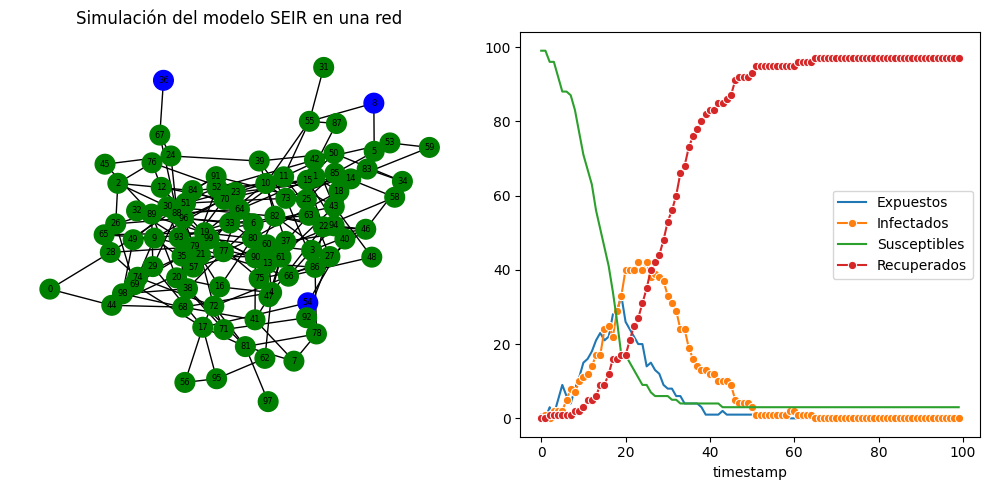

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_seir_model(graph, beta, gamma, sigma, num_iterations):
    num_nodes = graph.number_of_nodes()
    exposed = set()
    infected = set()
    recovered = set()

    # Seleccionar un nodo inicialmente expuesto al azar
    initial_node = np.random.choice(list(graph.nodes()))
    exposed.add(initial_node)
    quantity_timestamp = None
    quantity_exposed = []
    quantity_infected = []
    quantity_susceptible = []
    quantity_recovered = []

    for _ in range(num_iterations):
        # Crear copias de los conjuntos de nodos para evitar iterar sobre conjuntos cambiantes
        current_exposed = list(exposed)
        current_infected = list(infected)
        current_recovered = list(recovered)
        quantity_exposed.append(len(current_exposed))
        quantity_infected.append(len(current_infected))
        quantity_susceptible.append(num_nodes - len(current_exposed) - len(current_infected) - len(current_recovered))
        quantity_recovered.append(len(current_recovered))

        # Iterar sobre los nodos expuestos
        for node in current_exposed:
            # Incubar la enfermedad y pasar al estado infectado con cierta probabilidad
            if np.random.random() < sigma:
                exposed.remove(node)
                infected.add(node)

        # Iterar sobre los nodos infectados
        for node in current_infected:
            neighbors = list(graph.neighbors(node))

            # Propagar la infección a los vecinos susceptibles
            for neighbor in neighbors:
                if neighbor not in exposed and neighbor not in infected and neighbor not in recovered and np.random.random() < beta:
                    exposed.add(neighbor)

            # Recuperar los nodos infectados con cierta probabilidad
            if np.random.random() < gamma:
                infected.remove(node)
                recovered.add(node)

    quantity_timestamp = pd.DataFrame({'timestamp': np.arange(0, num_iterations),
                                       'num_exposed': np.array(quantity_exposed),
                                       'num_infected': np.array(quantity_infected),
                                       'num_susceptible': np.array(quantity_susceptible),
                                       'num_recovered': np.array(quantity_recovered)})

    return exposed, infected, recovered, quantity_timestamp


# Crear un grafo aleatorio utilizando la biblioteca NetworkX
num_nodes = 100
avg_degree = 4
graph = nx.erdos_renyi_graph(num_nodes, avg_degree / num_nodes)

# Parámetros de la simulación
beta = 0.3  # Tasa de transmisión
gamma = 0.1  # Tasa de recuperación
sigma = 0.2  # Tasa de incubación
num_iterations = 100

# Simular el modelo SEIR
exposed_nodes, infected_nodes, recovered_nodes, inf_df = simulate_seir_model(graph, beta, gamma, sigma, num_iterations)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Dibujar el grafo con los nodos en diferentes estados resaltados con diferentes colores
node_colors = []
for node in graph.nodes():
    if node in exposed_nodes:
        node_colors.append('yellow')
    elif node in infected_nodes:
        node_colors.append('red')
    elif node in recovered_nodes:
        node_colors.append('green')
    else:
        node_colors.append('blue')

axes[0].set_title('Simulación del modelo SEIR en una red')
nx.draw(graph, with_labels=True, node_color=node_colors, ax=axes[0], node_size=200, font_size=6)

sns.lineplot(x=inf_df['timestamp'], y=inf_df['num_exposed'], ax=axes[1], label='Expuestos')
sns.lineplot(x=inf_df['timestamp'], y=inf_df['num_infected'], ax=axes[1], label='Infectados', marker='o')
sns.lineplot(x=inf_df['timestamp'], y=inf_df['num_susceptible'], ax=axes[1], label='Susceptibles')
sns.lineplot(x=inf_df['timestamp'], y=inf_df['num_recovered'], ax=axes[1], label='Recuperados', marker='o')
axes[1].set_ylabel('')

plt.legend()
plt.tight_layout()

plt.show()
